# Flare 2021/05/26

In [1]:
import numpy as np
# import copy
# import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
# import sunpy
# from scipy.io import readsav
# import cocopy as cp
# from ISPy.io import solarnet
# import sunpy.map
# import astropy.units as u
# from scipy.io import readsav as rs
# from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
# import datetime as dt
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# from matplotlib.collections import PolyCollection
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi3 as un

In [2]:
import os

# Specify the path to the folder you want to list files from
folder_path = "E:\solar flares\data\\2021-05-26\\fits\\nb_8542_2021-05-26T09_48_51_09_48_51=0-82_stokes_corrected_nup_export2022-07-08T17_51_21_im.fits"

maximum = 1000 # to be determined 

def timeframe_to_filename_fits(frame):
    if frame <0 or frame > maximum:
        raise IndexError(f'frame number {frame} is not in [0, {max}).')
    else:
        return folder_path
ttff = timeframe_to_filename_fits



<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_2860\3608985211.py:4: SyntaxWarning: invalid escape sequence '\s'
  folder_path = "E:\solar flares\data\\2021-05-26\\fits\\nb_8542_2021-05-26T09_48_51_09_48_51=0-82_stokes_corrected_nup_export2022-07-08T17_51_21_im.fits"


In [3]:
head0 = f.getheader(ttff(0))
maximum = head0['NAXIS5']
head0

 [astropy.io.fits.verify]


SIMPLE  =                    T / Written by IDL:  Wed Jun  9 10:29:00 2021      
BITPIX  =                  -32 /                                                
NAXIS   =                    5 / Number of data axes                            
NAXIS1  =                 1392 / Number of positions along axis 1               
NAXIS2  =                 1392 / Number of positions along axis 2               
NAXIS3  =                   17 / Number of positions along axis 3               
NAXIS4  =                    4 / Number of positions along axis 4               
NAXIS5  =                   83 / Number of positions along axis 5               
EXTEND  =                    T / The file has extension(s).                     
OBS_HDU =                    1 /                                                
BUNIT   = 'W m^-2 Hz^-1 sr^-1' / Units in array                                 
BTYPE   = 'Intensity'          / Type of data in array                          
FILTER1 = '8542    '        

In [4]:
with f.open(timeframe_to_filename_fits(0)) as io :
    print(io)
    print(len(io))
    for i, hdl in enumerate(io[:10]):
        print(f'\n next hdl number {i} : {hdl}')
        print(np.shape(hdl.data))
        print(hdl.data[0][0])
    tlist2 = io[4].data
    pos = io[1].data

# shape data: [(58, 1, 33, 2773, 2783)-data,  positons , array SIM_XY????, date and time frames,  
# (58, 1, 1, 2773, 2783)-data, terug date+time frames, nog eens date+time frames, en nog eens, array orde e10,  
# frame umbers , ....     errors?,  errors?]


wvl = pos[0][0][:,:,0,0,2][0]*10
np.save('line_data/wav_sstCaIR.npy', wvl)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001B41355F6B0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001B41355E2A0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x000001B41355EC60>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001B4135A3230>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001B4135B9130>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001B4135B9880>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001B4135B9FD0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001B4135BA720>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001B4135BB290>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001B4135BBBC0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001B4135BC530>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001B4135BCC80>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001B4135BD3D0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x000001B4135BDB20>, <astropy.io.fits.hdu.ta

In [5]:
pos[0][0][:,:,0,0,2][0]

array([854.1011, 854.1183, 854.1355, 854.1484, 854.1613, 854.1742,
       854.1828, 854.1914, 854.2   , 854.2086, 854.2172, 854.2258,
       854.2387, 854.2516, 854.2645, 854.2817, 854.2989], dtype='>f8')

In [6]:
tlist = np.array(tlist2[0])
tlist3 = tlist[0,:,0,0,0, 0]
tlist3[2][17:], tlist3

('36.93561',
 array(['2021-05-26T09:48:58.57374', '2021-05-26T09:49:17.75485',
        '2021-05-26T09:49:36.93561', '2021-05-26T09:49:56.11652',
        '2021-05-26T09:50:15.29748', '2021-05-26T09:50:34.47827',
        '2021-05-26T09:50:53.65925', '2021-05-26T09:51:12.84028',
        '2021-05-26T09:51:32.02145', '2021-05-26T09:51:51.20243',
        '2021-05-26T09:52:10.38354', '2021-05-26T09:52:29.56459',
        '2021-05-26T09:52:48.74567', '2021-05-26T09:53:07.92656',
        '2021-05-26T09:53:27.10758', '2021-05-26T09:53:46.28862',
        '2021-05-26T09:54:05.46969', '2021-05-26T09:54:24.65062',
        '2021-05-26T09:54:43.83172', '2021-05-26T09:55:03.01265',
        '2021-05-26T09:55:22.19374', '2021-05-26T09:55:41.37477',
        '2021-05-26T09:56:00.55576', '2021-05-26T09:56:19.73660',
        '2021-05-26T09:56:38.91756', '2021-05-26T09:56:58.09861',
        '2021-05-26T09:57:17.27964', '2021-05-26T09:57:36.46062',
        '2021-05-26T09:57:55.64160', '2021-05-26T09:58:14.82261

In [7]:
time_list = [t[11:] for t in tlist3]
time_list

['09:48:58.57374',
 '09:49:17.75485',
 '09:49:36.93561',
 '09:49:56.11652',
 '09:50:15.29748',
 '09:50:34.47827',
 '09:50:53.65925',
 '09:51:12.84028',
 '09:51:32.02145',
 '09:51:51.20243',
 '09:52:10.38354',
 '09:52:29.56459',
 '09:52:48.74567',
 '09:53:07.92656',
 '09:53:27.10758',
 '09:53:46.28862',
 '09:54:05.46969',
 '09:54:24.65062',
 '09:54:43.83172',
 '09:55:03.01265',
 '09:55:22.19374',
 '09:55:41.37477',
 '09:56:00.55576',
 '09:56:19.73660',
 '09:56:38.91756',
 '09:56:58.09861',
 '09:57:17.27964',
 '09:57:36.46062',
 '09:57:55.64160',
 '09:58:14.82261',
 '09:58:34.00361',
 '09:58:53.18459',
 '09:59:12.36561',
 '09:59:31.54655',
 '09:59:50.72767',
 '10:00:09.90871',
 '10:00:29.08966',
 '10:00:48.27068',
 '10:01:07.45166',
 '10:01:26.63269',
 '10:01:45.81365',
 '10:02:04.99479',
 '10:02:24.17581',
 '10:02:43.35678',
 '10:03:02.53780',
 '10:03:21.71889',
 '10:03:40.89996',
 '10:04:00.08093',
 '10:04:19.26192',
 '10:04:38.44290',
 '10:04:57.62393',
 '10:05:16.80489',
 '10:05:35.9

In [8]:
def datacube(timeframe):
    if timeframe < maximum and timeframe >= 0:
        return f.getdata(ttff(timeframe))[timeframe][0] # TODO: werk hier verder
    else:
        raise IndexError(
            f"Timeframe {timeframe} is negative or exeeds numer of frames {maximum}."
        )

In [9]:
print(np.any(np.isnan(datacube(0)[0,:,:])), np.shape(datacube(0)))
print(f"the maximum attained value in frame 0 is {np.max(datacube(0))} and the 98 percile is {np.percentile(datacube(0), 98)}")
datacube(0)[::3, ::100, ::100]

True (17, 1392, 1392)
the maximum attained value in frame 0 is nan and the 98 percile is nan


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

E:\solar flares\data\2021-05-26\fits\nb_8542_2021-05-26T09_48_51_09_48_51=0-82_stokes_corrected_nup_export2022-07-08T17_51_21_im.fits
s=(17, 1392, 1392)
the shape of the data is (83, '??', 17, 1392, 1392)
the wavelengths are self._wavel = array([8541.011, 8541.183, 8541.355, 8541.484, 8541.613, 8541.742,
       8541.828, 8541.914, 8542.   , 8542.086, 8542.172, 8542.258,
       8542.387, 8542.516, 8542.645, 8542.817, 8542.989])
Use arguments as dictionary with 'frames_of_overlap' to define a list of considerd frames to calculate overlap
calculated boundary at frame 0


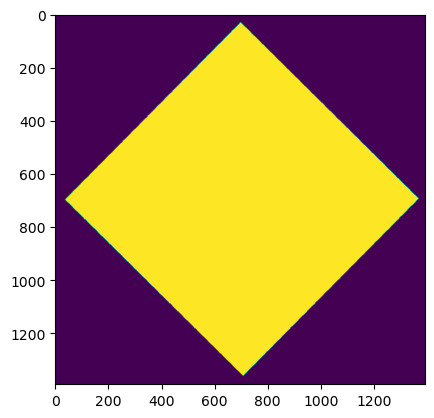

calculated boundary at frame 10


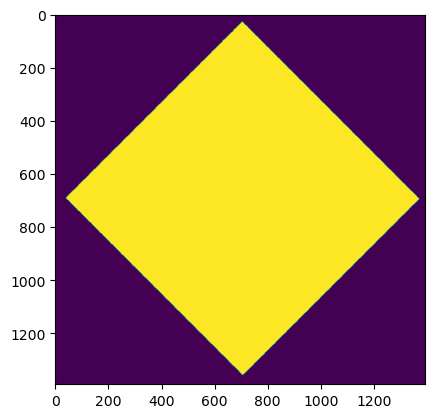

calculated boundary at frame 20


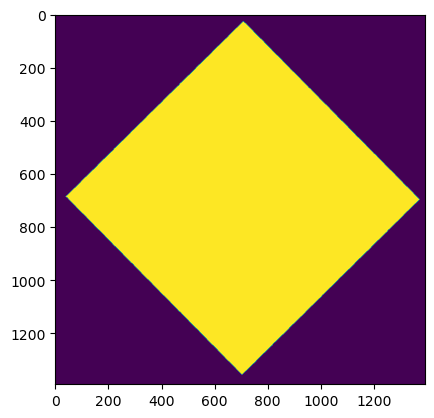

calculated boundary at frame 30


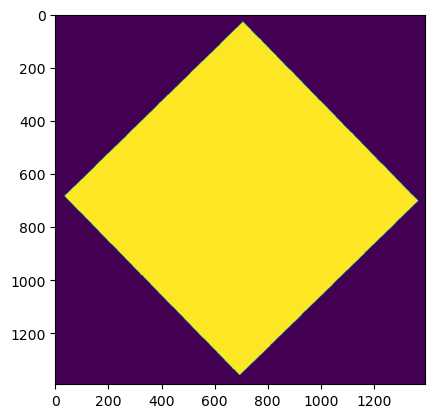

calculated boundary at frame 40


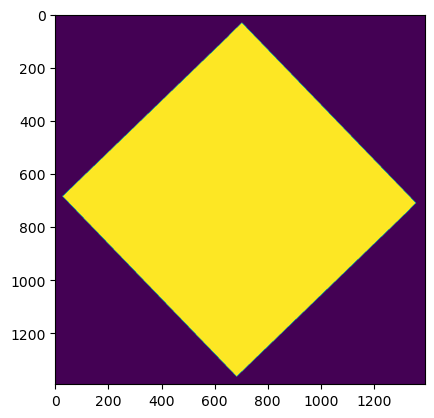

calculated boundary at frame 50


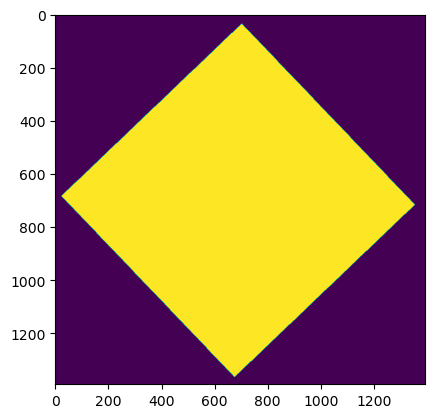

calculated boundary at frame 60


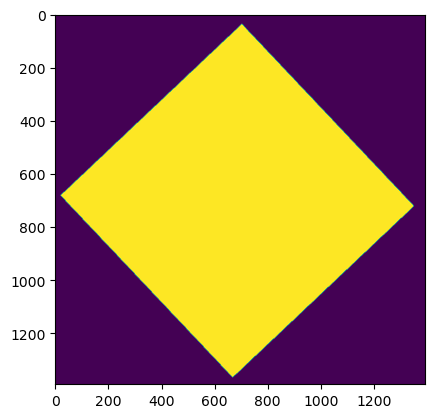

calculated boundary at frame 70


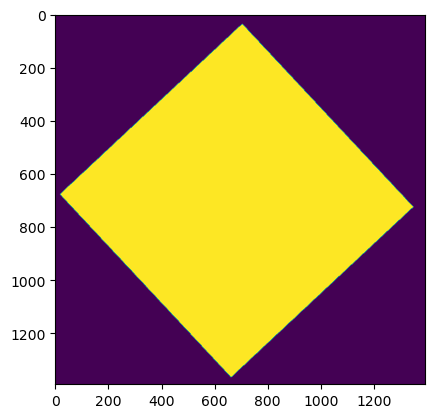

calculated boundary at frame 80


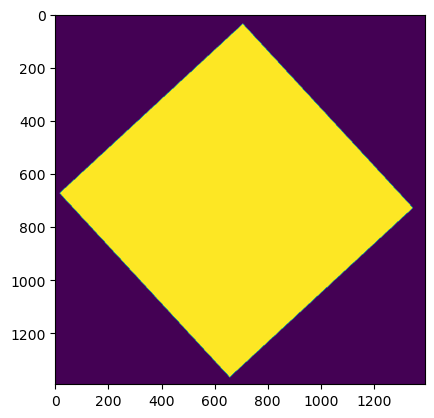

calculated boundary over folowing frames range(0, 83, 10)
Boundary
Blue=Outside, yellow=Inside


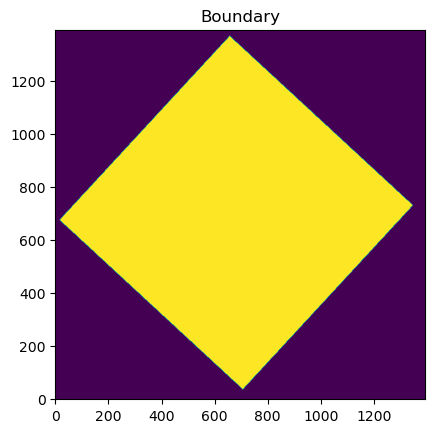

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
reload(un)


CaIR = un.SST_data_from_multiple_fits_files(
    timeframe_to_filename_fits,
    spectfilename='line_data/wav_sstCaIR.npy', 
    number_of_frames=maximum,
    time=time_list, name_of_line='CaIR21', 
    thresh=[0, np.percentile(datacube(0), 99.5)],  
    boundary_methode='search_overlap', 
    boundary_arguments = {"error":0.01}, 
    with_stokes=True, 
    with_time=True, 
    alternative_datacube=datacube
    )

# CaIR.datacube
# np.shape(CaIR.datacube), CaIR.datacube(0)[0:30:5,10:20:5, 100:200:30], 
CaIR.boundary


In [11]:
secs = un.get_TIME(CaIR)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} seconds for this line!")
print(f'{CaIR.shape=}')

the mean cadence is 19.182926829268233 seconds for this line!
CaIR.shape=(83, '??', 17, 1392, 1392)


The guessed filters are [[2.3333333333333335, 2.125], [8.0, 2.125], [13.666666666666666, 2.125]]


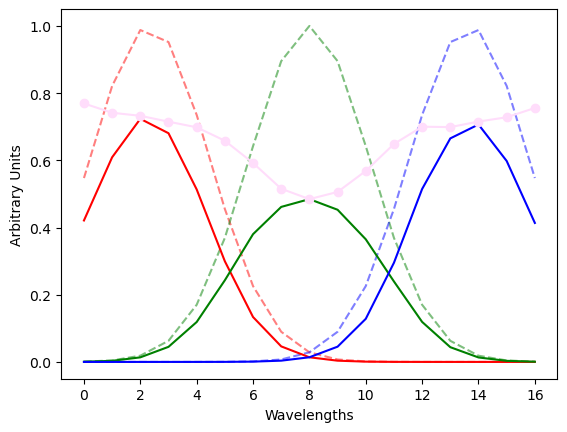

In [12]:
# %matplotlib inline
CaIR.update_filters(None)# [[3,2], [7,2], [11,2]]
CaIR.plot_filt(880,900)
plt.show()

In [13]:
# # %matplotlib widget
# print(f'the number of frames is {CaIR._number_of_frames}')
# for frame in range(0 ,CaIR._number_of_frames, 60):
#     # frame=0
#     CaIR.ccp_frame(frame,Show=False)
#     print(f'frame number {frame} at time {CaIR._time[frame]}')
#     plt.imshow(CaIR.current_ccp, origin='lower')
#     plt.imshow(CaIR.calculate_boundary(frame=frame), alpha=0.2, origin="lower")

#     # plt.imshow(CaIR.boundary, origin='lower', alpha=0.2)
#     plt.show()
#     print(np.shape(CaIR.current_ccp))#,np.shape(CaIR.boundary))

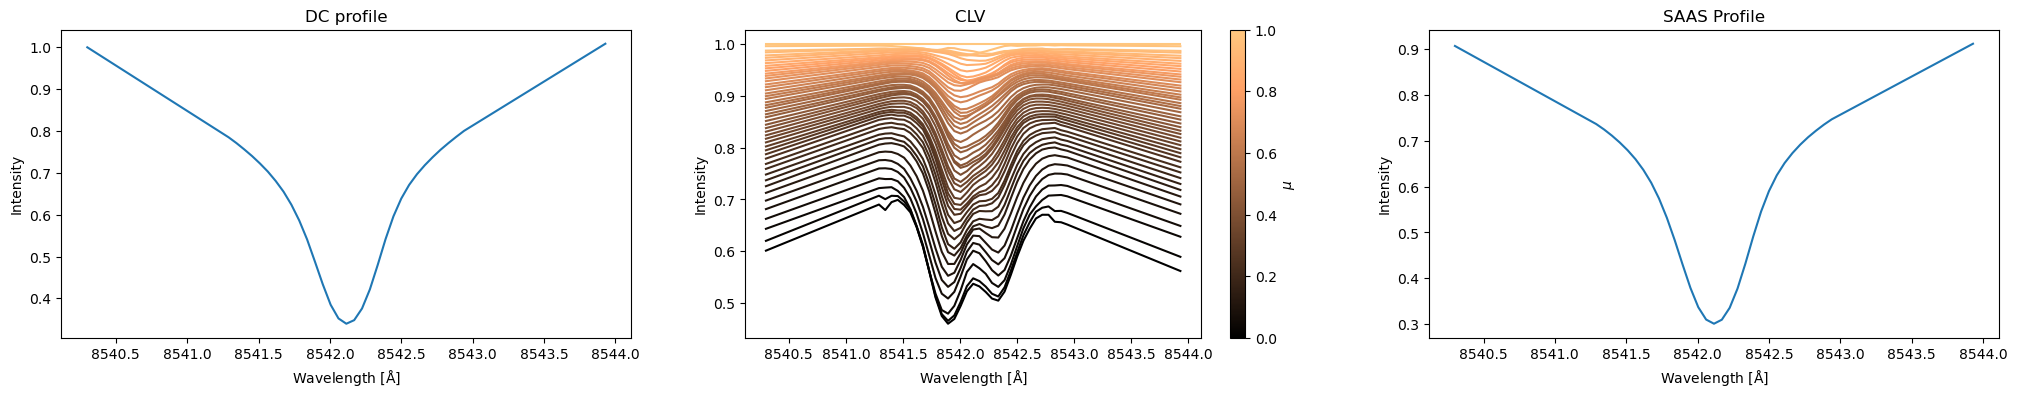

8542.114877954633 8542.114877954633


In [14]:
reload(un)
theor_CaIR = un.linestudier('E:/solar flares/data/2017-09-06/fits/8542_clv.fits', atlas=None, nr=101)
print(np.median(theor_CaIR.sst_wav), np.mean(theor_CaIR.sst_wav))

## Calculating the $\mu$ !!!!! 


In [15]:
CaIR.shape

(83, '??', 17, 1392, 1392)

In [16]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(CaIR.filename) as io:
    for i, hdu in enumerate(io):
        # print(f"HDU {i+1}:")
        print(add_enters(str(hdu.header), length_row=79))
        try: 
            x= hdu.header['CRVAL1A']
            y = hdu.header['CRVAL2A']
            print("x =", x, "y=", y)
            pix_x= hdu.header['CRPIX1A']
            pix_y = hdu.header['CRPIX2A']
            print("middel pixel x =", pix_x, "middel pixel y =", pix_y)
        except KeyError:
            # raise(KeyError)
            pass


SIMPLE  =                    T / Written by IDL:  Wed Jun  9 10:29:00 2021     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 1392 / Number of positions along axis 1              
 NAXIS2  =                 1392 / Number of positions along axis 2              
 NAXIS3  =                   17 / Number of positions along axis 3              
 NAXIS4  =                    4 / Number of positions along axis 4              
 NAXIS5  =                   83 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 OBS_HDU =                    1 /                                               
 BUNIT   = 'W m^-2 Hz^-1 sr^-1' / Units in array                                
 BTYPE   = 'Intensity'          / Type of data in array                         
 FILTER1 = '8542    '        

In [17]:
xy = pos[0][0][:,:,:,:, :2]
# seems to be centers per frame but different from those in the header???
xy, np.shape(xy), xy[0,0]

(array([[[[[657.23569412, 329.44853422],
           [739.58289412, 329.44853422]],
 
          [[657.23569412, 411.79573422],
           [739.58289412, 411.79573422]]],
 
 
         [[[657.23569412, 329.44853422],
           [739.58289412, 329.44853422]],
 
          [[657.23569412, 411.79573422],
           [739.58289412, 411.79573422]]],
 
 
         [[[657.23569412, 329.44853422],
           [739.58289412, 329.44853422]],
 
          [[657.23569412, 411.79573422],
           [739.58289412, 411.79573422]]],
 
 
         ...,
 
 
         [[[657.23569412, 329.44853422],
           [739.58289412, 329.44853422]],
 
          [[657.23569412, 411.79573422],
           [739.58289412, 411.79573422]]],
 
 
         [[[657.23569412, 329.44853422],
           [739.58289412, 329.44853422]],
 
          [[657.23569412, 411.79573422],
           [739.58289412, 411.79573422]]],
 
 
         [[[657.23569412, 329.44853422],
           [739.58289412, 329.44853422]],
 
          [[657.23569412, 411.79

width = 90.48
[658.60603885 740.95323885 330.07697337 412.42417337]
does MU contain nan's? False
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.5642762899044452 for timeframe 41
Coundourplot succesfully saved.


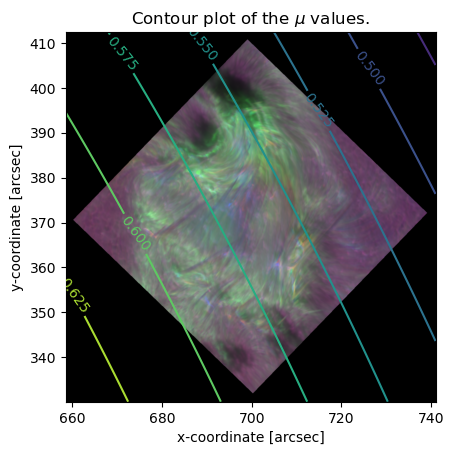

In [18]:
def calculate_mu(x,y, radius=959.63):
    # sourcery skip: inline-immediately-returned-variable
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

width = 0.13 * np.average(CaIR.shape[-2:])/2
print(f"{width = }")

# or per pixel 0.13 arcsec

position = (x,y)



fxp = np.array(xy[maximum//2,0,0,:,0])
fyp = np.array(xy[maximum//2,0,:,0,1])
fxp = np.concatenate((fxp, fyp))
print(fxp)

x = np.linspace(fxp[0], fxp[1], CaIR.shape[4])
y = np.linspace(fyp[0], fyp[1], CaIR.shape[3])

xx, yy = np.meshgrid(x, y)
xx0=xx
yy0=yy

MU = calculate_mu(xx,yy)
print("does MU contain nan's?", np.any(np.isnan(MU)))


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    try:
        return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)
    except ValueError:
        x = np.abs(theor_line.sst_mu - mu)
        ind = np.where(x == np.min(x))[0]
        return theor_line.sst_clv[ind]




def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.ccp_frame(timeFrame, False)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        B = over.boundary
        B = np.where(B == 1, 1, np.nan)
        K = MU * B
        av_mu = np.nanmean(K)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("Coundourplot succesfully saved.")
        
    if over is not None:
        return av_mu
 
mu = give_mu_contourplot(MU, xx, yy, fxp, over=CaIR, save=True, save_name=CaIR.name_of_line, timeFrame=maximum//2)
sst_data = CaIR
theor_line = theor_CaIR
set_mu(CaIR, mu)
fix_mu_theor(mu, theor_line)
# theor_line.sst_mu[theor_CaIR.index_mu], theor_line.sst_clv[theor_CaIR.index_mu][0], clv_fit(mu, theor_line)


(140, 140) (140, 140) (139, 139)


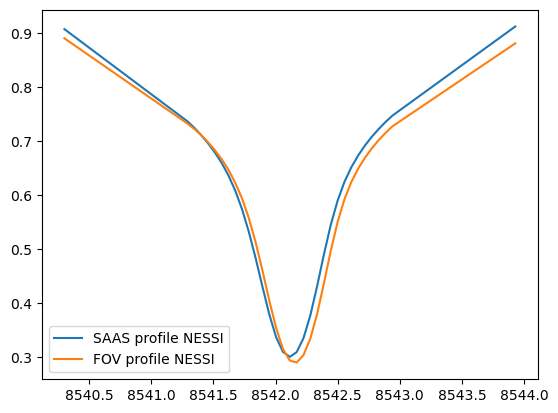

In [19]:
theor_CaIR.set_fov( xx, yy, CaIR.boundary, sr=959.63, reduction=10)



## Finding a suitable quiet sun patch

<>:41: SyntaxWarning: invalid escape sequence '\C'
<>:41: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_2860\281062672.py:41: SyntaxWarning: invalid escape sequence '\C'
  fig.savefig(f'plots\Choosing_quiet_sun_patch_CaIR.png')


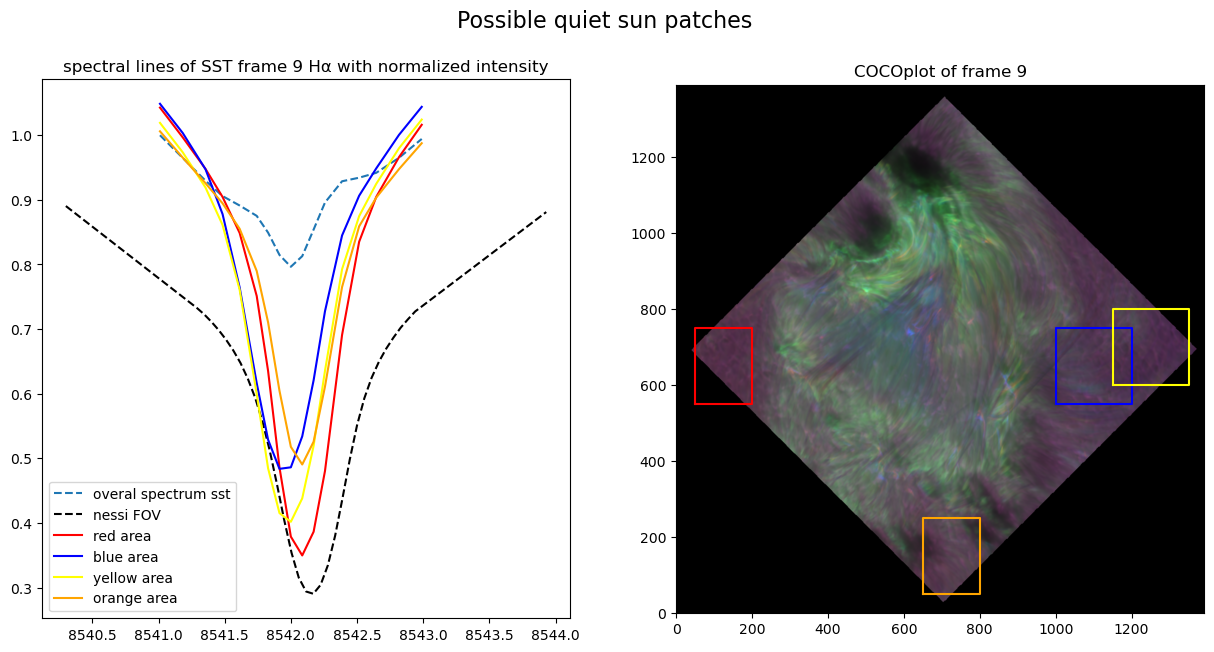

In [20]:
frame=9

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

CaIR.ccp_frame(frame,Show=False)
# xlim, ylim
X = [[(50,200),(550,750)], [(1000,1200),(550,750)], [(1150,1350),(600, 800)],  [(650,800),(50, 250)]]
    #  [(90,350), (800,969)] , [(90,290), (870,969)] ]# max x: 963, y: 969
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
CaIR.frame_integrated_spect(frame)
ax[0].plot(CaIR._wavel, CaIR.av_spect, '--', label='overal spectrum sst')
# ax[0].plot(theor_CaIR.sst_wav + theta[0], theta[2] * theor_CaIR.sst_dc + theta[1], label='saas nessi')
# theta = [ 2.196e-01 , 6.288e-02 , 8.458e-01]
theta = [0,0,1]


ax[0].plot(theor_CaIR.sst_wav + theta[0], theta[2] * theor_CaIR.spectr_fov, '--', label='nessi FOV', color='black')

ax[1].imshow(CaIR.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(CaIR._wavel, CaIR.frame_integrated_spect(frame, xlim=xlim, ylim=ylim), color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()

# Save the figure
fig.savefig(f'plots\Choosing_quiet_sun_patch_CaIR.png')
plt.show()


### The quiet sun patch

fill in here which color the wanted quiet sun patch had 

In [21]:
color_wanted_patch = 'yellow'

the edges of the patch are denoted by the xlim: (1150, 1350) and ylim: (600, 800)


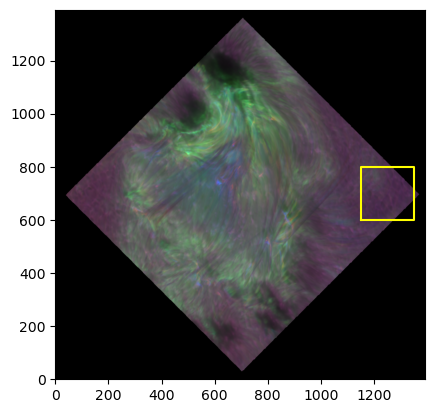

{'frame': 9, 'xlim': (1150, 1350), 'ylim': (600, 800), 'color': 'yellow'}

In [22]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaIR.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
CaIR.quiet_sun

The quiet sun is pick at x (732.5764388499472, 371.487373368732) with average              mu 0.5170786882820905


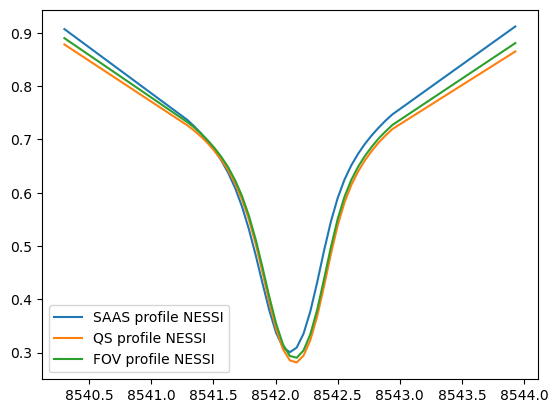

In [23]:
theor_CaIR.set_quiet_sun(xlim=xlim, ylim=ylim)


[8541.011 8541.183 8541.355 8541.484 8541.613 8541.742 8541.828 8541.914
 8542.    8542.086 8542.172 8542.258 8542.387 8542.516 8542.645 8542.817
 8542.989] [1.01875818 0.97320068 0.91875559 0.86081415 0.76067245 0.5993672
 0.48443905 0.41514766 0.40170667 0.43794599 0.51925951 0.63529909
 0.79231948 0.87444144 0.92436093 0.9794029  1.02383721] [0.76920272 0.74282952 0.71457195 0.68484268 0.6440771  0.57920628
 0.5139466  0.43091061 0.34870358 0.29643492 0.28206112 0.31192769
 0.42143495 0.55138238 0.63095764 0.69060237 0.72667676]
[-0.11487795  1.31585053]
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 91.34347899772993
        x: [-1.649e-01  1.361e+00]
      nit: 10
      jac: [-8.583e-06  8.583e-06]
 hess_inv: [[ 1.026e-06  2.139e-08]
            [ 2.139e-08  2.367e-06]]
     nfev: 48
     njev: 16


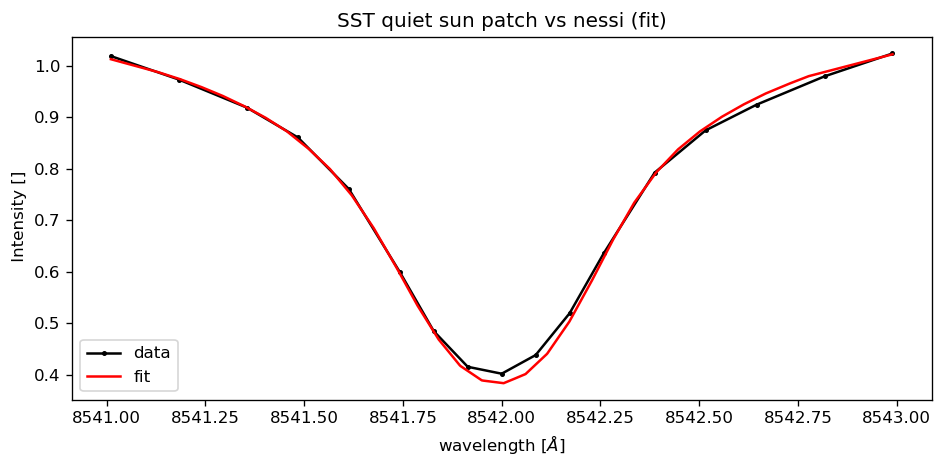

de p-waarde is  0.9782036636230739 
Chi^2 reduced= 6.089565266515328 
aantal vrijheidgraden= 15 
chi^2= 91.34347899772993
we behouden de fit tot op een betrouwbaarheidsniveau van  0.9782036636230739 
Oftewel verwerp als p-waarde <lpha-niveau 


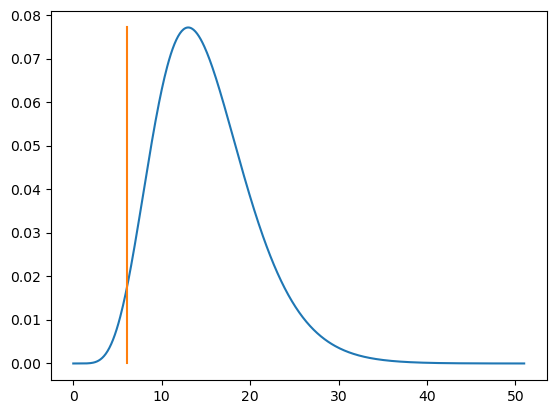

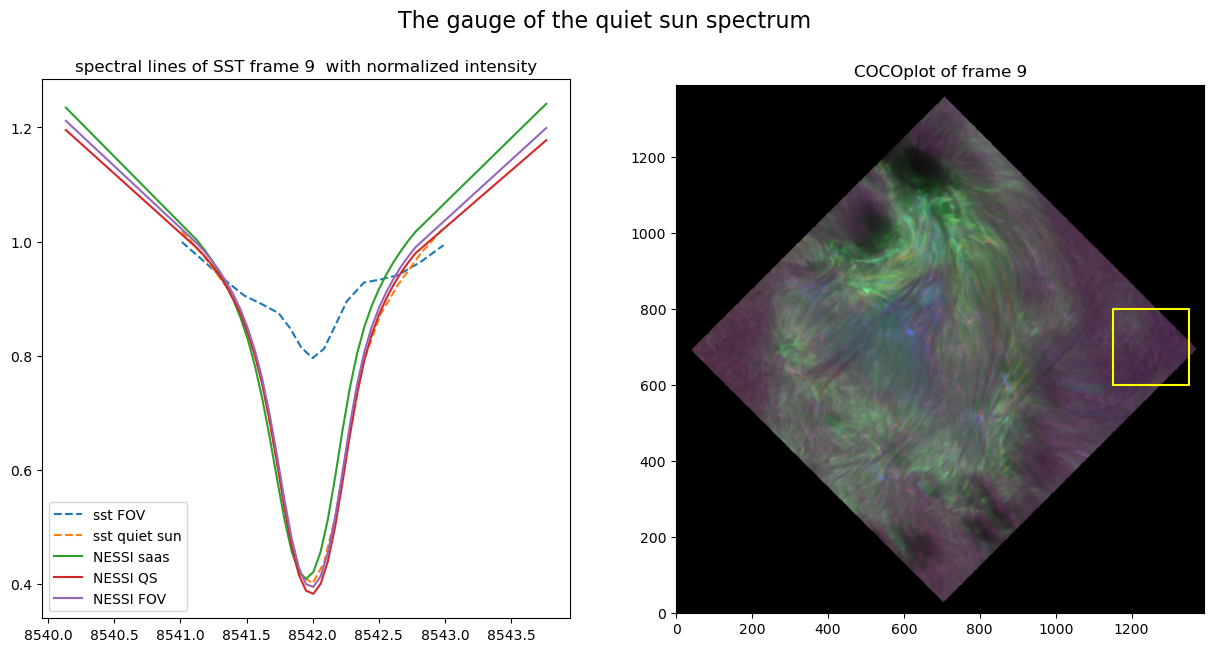

In [24]:
reload(un)
un.fit_qs_to_NESSI(theor_CaIR, CaIR)

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

## The full FOV integrated spectrum over time:

In [25]:
sst_data = CaIR
CaIR.shape

(83, '??', 17, 1392, 1392)

In [26]:
CaIR.calculate__FOV_spect_over_time()

In [27]:
sst_data.quiet_sun

{'frame': 9, 'xlim': (1150, 1350), 'ylim': (600, 800), 'color': 'yellow'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [27] at time ['t=09:57:36 UT'].
The SST data runs from t=09:48:58 UT to t=10:15:11 UT.
The areafactor for THIS flare is 0.0010726615227556956 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 86.2%.


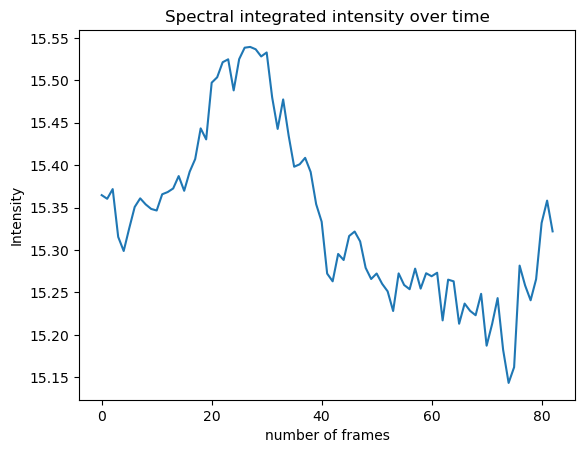

In [28]:
reload(un)
un.save_for_further_analysis(CaIR, theor_CaIR)


# Movie Making

[-0.16488875037807735, 0, 1.3613020742573856]
Frame: 0, 09:48:58.57374, total number of frames: 83 


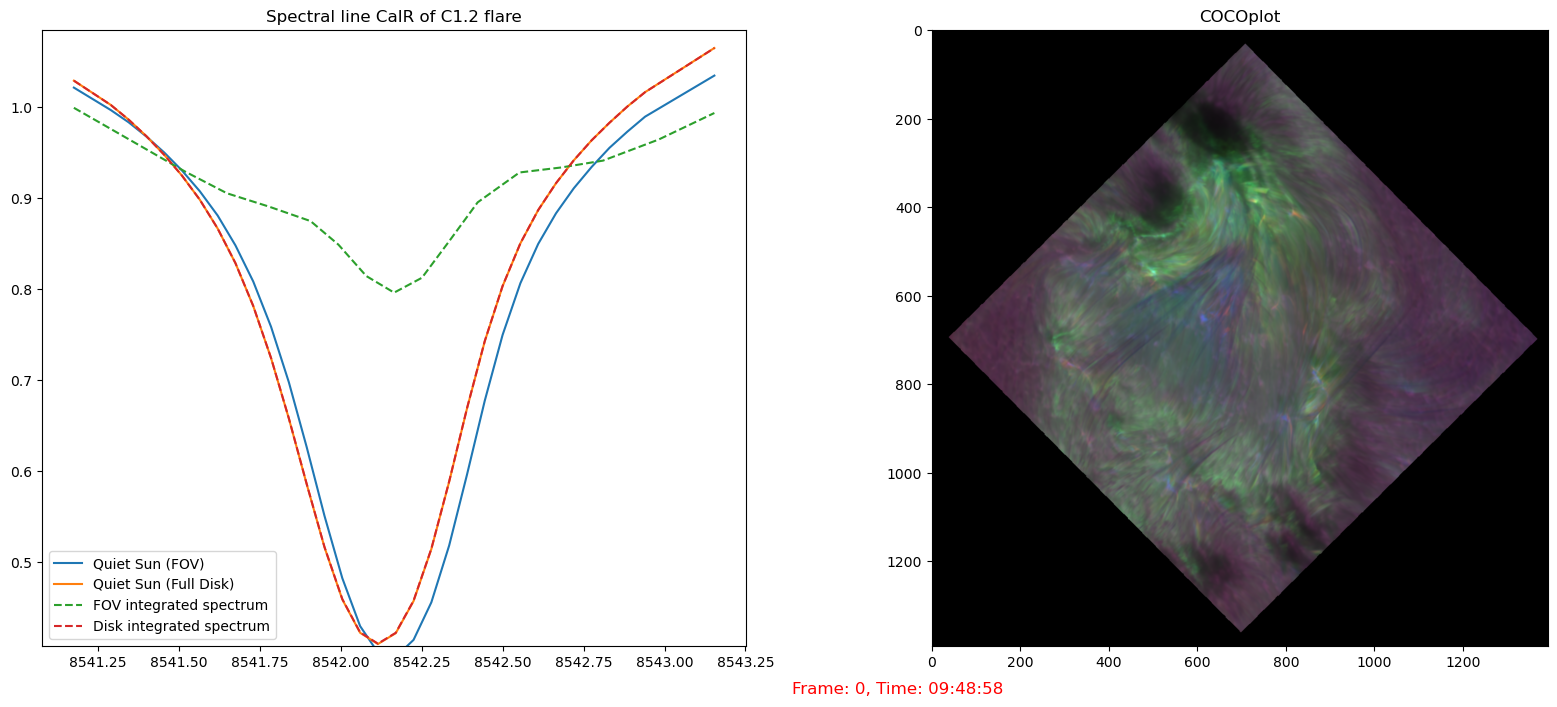

In [29]:
# fill in here all arguments
theor_line = theor_CaIR
sst_data = CaIR
name_of_flare = "C1.2"
name_of_line = "CaIR"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line, step=1, show_boundary=False)